In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = datasets.load_breast_cancer(as_frame=True)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [4]:
model = KMeans(n_clusters=2)

In [5]:
model.fit(data['data'])

/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [6]:
y_labels = model.predict(data['data'])
print(y_labels)

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

In [7]:
data['target']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

it looks like the labels are the wrong way round due to the random start in the algorithm so lets flip them (e.g. turn 0 to 1 and 1 to 0)

In [8]:
# create loop to swap the labels
for i in range(y_labels.size):
    if y_labels[i] == 0:
        y_labels[i] = 1
    elif y_labels[i] == 1:
        y_labels[i] = 0

In [9]:
y_labels

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

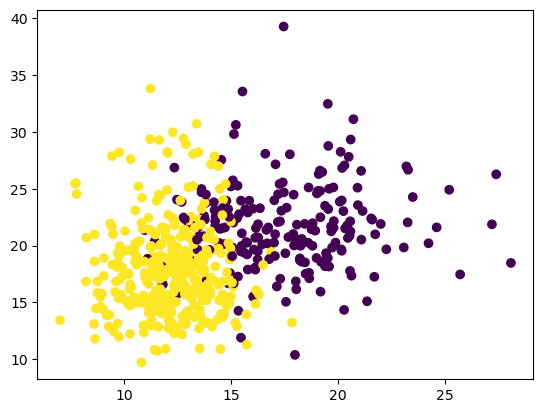

In [10]:
X = data['data']['mean radius']
y = data['data']['mean texture']
plt.scatter(X, y, c=data['target'])
plt.show()

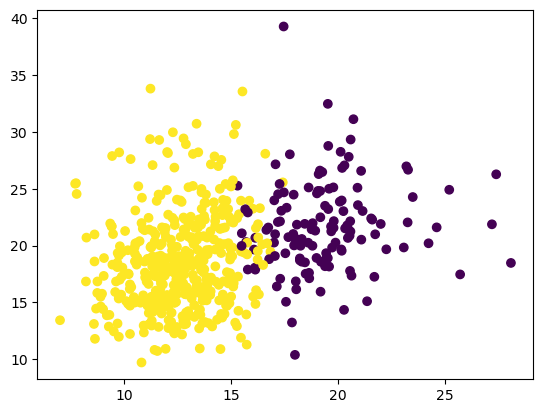

In [11]:
xs = data['data']['mean radius']
ys = data['data']['mean texture']
plt.scatter(xs, ys, c=y_labels)
plt.show()

## Evaluating Clustering

map target names to numbers

In [12]:
def map_diag(row):
    if row['labels'] == 0:
        return 'malignant'
    elif row['labels'] == 1:
        return 'benign'
    else:
        return None

In [13]:
targetdf = data['target_names']
targetdf

array(['malignant', 'benign'], dtype='<U9')

In [14]:
df = pd.DataFrame({'labels': data['target']})

In [15]:
df['diag'] = df.apply(map_diag, axis=1)
df

,labels,diag
0,0,malignant
1,0,malignant
2,0,malignant
3,0,malignant
4,0,malignant
...,...,...
564,0,malignant
565,0,malignant
566,0,malignant
567,0,malignant


In [16]:
ct = pd.crosstab(df['labels'], df['diag'])
ct

diag,benign,malignant
labels,,
0,0,212
1,357,0


In [17]:
df_pred = pd.DataFrame({'labels': y_labels})
df_pred['diag'] = df_pred.apply(map_diag, axis=1)

In [18]:
ct_pred = pd.crosstab(df_pred['labels'], df_pred['diag'])
ct_pred

diag,benign,malignant
labels,,
0,0,131
1,438,0


## Inertia measure clustering quality

In [19]:
model.fit(data['data'])
model.inertia_

/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


77943099.87829885

In [20]:
y_labels2 = model.predict(data['data'])
print(y_labels2)

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

In [21]:
inertia_value = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(data['data'])
    inertia_value.append(model.inertia_)
inertia_value

/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

[256677243.95420253,
 77943099.87829885,
 47264841.91676834,
 29226541.651979793,
 20612895.823981803,
 16566397.525447503,
 13267095.500813209,
 11505636.81690789,
 9448859.821344264,
 8382428.330065832]

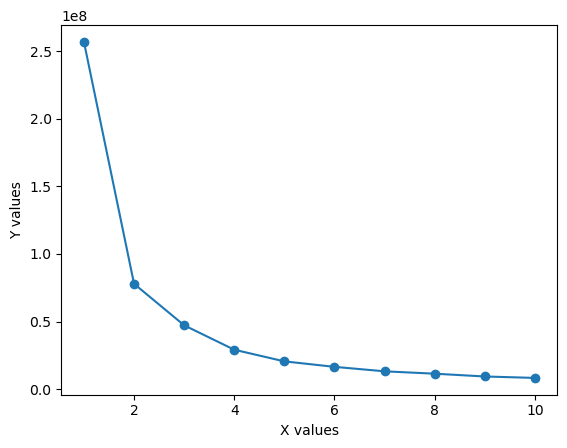

In [22]:
x_values = range(1, len(inertia_value)+1)

# Create a figure and axis object
fig, ax = plt.subplots()
ax.plot(x_values, inertia_value, '-o')
ax.set_xlabel('X values')
ax.set_ylabel('Y values')
plt.show()

## Transforming Features for better clustering

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(data['data'])
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(data['data'])

In [25]:
from sklearn.pipeline import make_pipeline

In [26]:
pipeline = make_pipeline(scaler, model)
pipeline.fit(data['data'])

/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=10))])

In [27]:
labels = pipeline.predict(data['data'])

In [28]:
df_pred = pd.DataFrame({'labels': y_labels})
df_pred['diag'] = df_pred.apply(map_diag, axis=1)
ct_pred = pd.crosstab(df_pred['labels'], df_pred['diag'])
ct_pred

diag,benign,malignant
labels,,
0,0,131
1,438,0


## T-SNE for 2-Dimensional Maps

In [29]:
from sklearn.manifold import TSNE

In [30]:
samples2 = data.data
diag2 = data.target

In [31]:
samples2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [32]:
model = TSNE(n_components=3, learning_rate=100)
transformed = model.fit_transform(samples2)

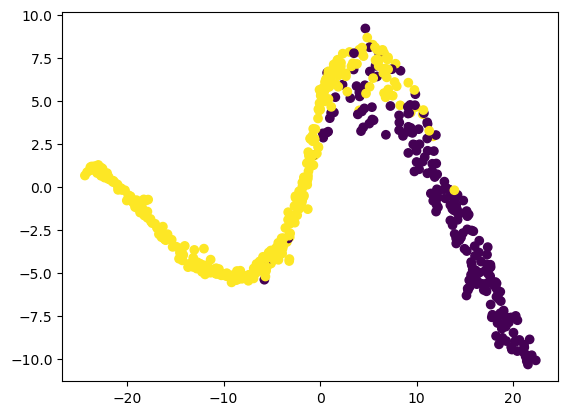

In [33]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=diag2)
plt.show()

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

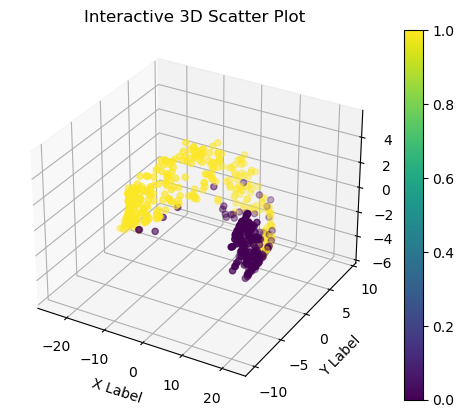

In [35]:
# Create the figure and axis objects
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = transformed[:,0]
y = transformed[:,1]
z = transformed[:,2]
# Create the scatter plot
scatter = ax.scatter(x, y, z, c=diag2)

# Add labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Interactive 3D Scatter Plot')

# Add a color bar
fig.colorbar(scatter)

# Add interactivity
def on_click(event):
    # Get the x and y coordinates of the mouse click
    xclick, yclick = event.xdata, event.ydata
    # Calculate the distance between the clicked point and each point in the data
    distances = np.sqrt((x - xclick)**2 + (y - yclick)**2)
    # Find the index of the closest point
    closest_index = np.argmin(distances)
    # Get the z value of the closest point
    closest_z = z[closest_index]
    # Update the color of the scatter plot to highlight the closest point
    scatter.set_array(z)
    scatter.set_color(plt.cm.viridis(closest_z))

# Connect the on_click function to the figure
fig.canvas.mpl_connect('button_press_event', on_click)

# Show the plot
plt.show()


In [36]:
@interact(xclick=(0, 1, 0.1), yclick=(0, 1, 0.1))
def create_plot(xclick=0.5, yclick=0.5):
    # Generate some random data
    x = transformed[:,0]
    y = transformed[:,1]
    z = transformed[:,2]

    # Create the figure and axis objects
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create the scatter plot
    scatter = ax.scatter(x, y, z, c=diag2)

    # Add labels and title
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('Interactive 3D Scatter Plot')

    # Add a color bar
    fig.colorbar(scatter)

    # Add interactivity
    # Calculate the distance between the clicked point and each point in the data
    distances = np.sqrt((x - xclick)**2 + (y - yclick)**2)
    # Find the index of the closest point
    closest_index = np.argmin(distances)
    # Get the z value of the closest point
    closest_z = z[closest_index]
    # Update the color of the scatter plot to highlight the closest point
    scatter.set_array(z)
    scatter.set_color(plt.cm.viridis(closest_z))

    # Show the plot
    plt.show()

interactive(children=(FloatSlider(value=0.5, description='xclick', max=1.0), FloatSlider(value=0.5, descriptio…